<a href="https://colab.research.google.com/github/gustavo21math/PyTorch/blob/main/Section_2__NN_architectures_and_their_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://miro.medium.com/v2/resize:fit:512/1*IMGOKBIN8qkOBt5CH55NSw.png)

# Section 2: Architectures in PyTorch

## What we are going to cover


## Lesson 1: Loading and Preprocessing Image Datasets with PyTorch

In this tutorial, we will cover the essential steps to load and preprocess image datasets using PyTorch. We'll use a real-world business case related dataset to make it practical and relevant. The dataset we'll use is the "Intel Image Classification" dataset, which contains images of various natural scenes categorized into six classes.

Dataset link: (https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data)


### 1. What is Computer Vision?

Computer vision is a field of artificial intelligence that enables computers to interpret and make decisions based on visual data.

### Importing libraries


In [ ]:
# !pip install torchvision

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

### 3. Loading the Dataset
The "Intel Image Classification" dataset can be downloaded from Kaggle. We will use the torchvision.datasets.ImageFolder to load the dataset.

First, download the dataset from Kaggle and unzip it to your working directory.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data_dir_train = "drive/MyDrive/PyTorchDataset/seg_train/seg_train"
data_dir_test = "drive/MyDrive/PyTorchDataset/seg_test/seg_test"

In [ ]:
!cp -r /content/drive/MyDrive/PyTorchDataset/seg_train/ /content/

In [ ]:
!cp -r /content/drive/MyDrive/PyTorchDataset/seg_test/ /content/

In [ ]:
local_dir_train = "seg_train/seg_train"
local_dir_test = "seg_test/seg_test"

### 4. Preprocessing the Dataset
Preprocessing is an essential step in preparing the data for training. Common preprocessing steps include resizing, normalization, and data augmentation.

Define the transformations:

### 5. Creating Data Loaders
Data loaders in PyTorch help in efficiently loading data during training. We will create a data loader for our training dataset.

12637

1405

### 6. Visualizing the Data
Visualizing the data helps in understanding the dataset and verifying that the preprocessing steps are correctly applied.

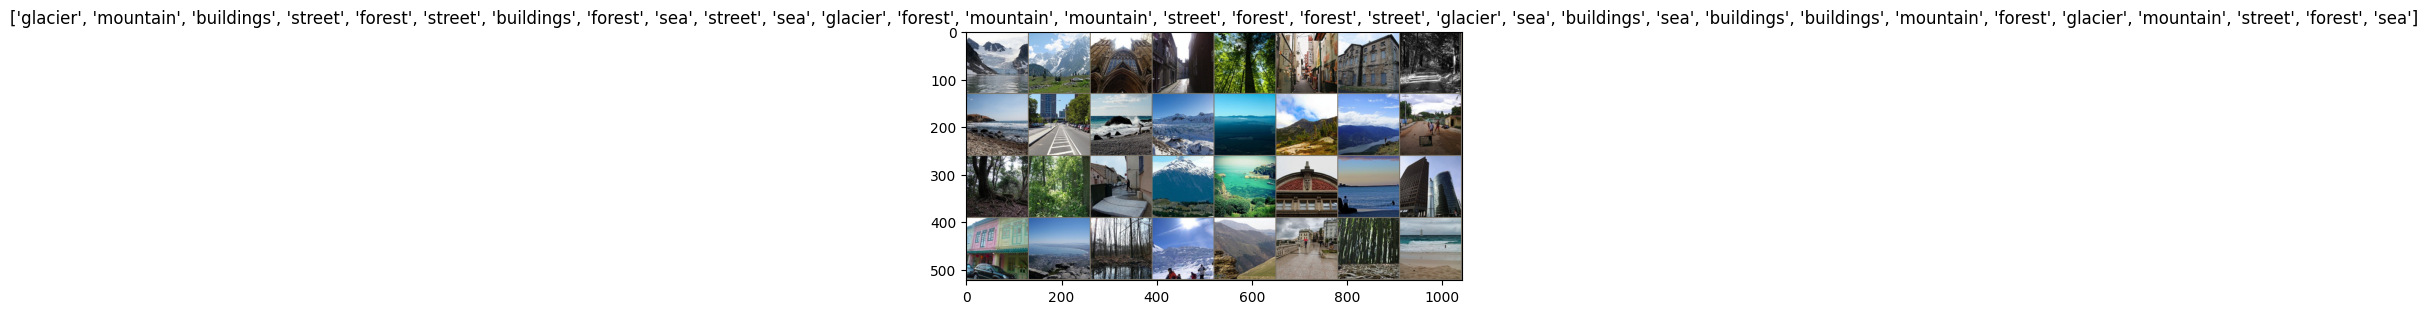

In [ ]:
# Function to visualize a batch of images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[dataset.classes[x] for x in classes])

##  Lesson 2: Understanding and Implementing a Basic CNN

In this tutorial, we will explore Convolutional Neural Networks (CNNs), a class of deep neural networks commonly used for analyzing visual data. We will understand the basic architecture of CNNs and implement a simple CNN model using PyTorch.

### Introduction to CNNs

Convolutional Neural Networks (CNNs) are specialized deep neural networks designed to process structured grid data, such as images. They have shown remarkable performance in tasks like image classification, object detection, and more.

### Understanding CNN Architecture

A typical CNN architecture consists of the following layers:
- **Convolutional Layers:** Apply convolution operations to the input data to extract features.
- **Activation Functions:** Introduce non-linearity into the model.
- **Pooling Layers:** Reduce the spatial dimensions of the data.
- **Fully Connected Layers:** Perform classification based on the extracted features.

### Wait wait, but can we use FCN for images as well? And if not why not?

![](https://i.ibb.co/JKqCYmG/Screenshot-2024-06-22-at-22-46-03.png)


### General architecture of a CNN model


![](https://i.ibb.co/5MckwHJ/Screenshot-2024-06-22-at-22-46-10.png)

### Explanation of CNN operations:


![](https://i.ibb.co/Bz0HNYh/Screenshot-2024-06-22-at-22-46-15.png)

![](https://i.ibb.co/tqp2H8M/Screenshot-2024-06-22-at-22-46-23.png)

![](https://i.ibb.co/NVrRn4z/Screenshot-2024-06-22-at-22-46-29.png)

![](https://i.ibb.co/Mk6qzNZ/Screenshot-2024-06-22-at-22-46-36.png)

![](https://miro.medium.com/v2/resize:fit:1400/0*fnHYnmwI_wmfwGAp.gif)







In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from tqdm.notebook import tqdm
device = torch.device("cuda")

In [ ]:
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        pass

    def forward(self, x):

        return x


###  Training and Evaluating the CNN

To train our model, we need to define a loss function and an optimizer. We'll use Cross-Entropy Loss and the Adam optimizer.


In [ ]:
# Training the model
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 1/5, Loss: 0.7831


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 2/5, Loss: 0.5239


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 3/5, Loss: 0.3750


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 4/5, Loss: 0.2341


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 5/5, Loss: 0.1410


### Evaluation

Finally, let's evaluate our model on the validation set:

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 81.40%



## Lesson 3: Layers in CNNs and Implementing Advanced Features

In this tutorial, we will dive deeper into the architecture of Convolutional Neural Networks (CNNs). We will understand the different layers involved in a CNN, such as pooling and fully connected layers, and implement a more advanced CNN model.


### What are pooling layers?

Pooling layers are used in CNNs to decrease general size of an input tensor (or an image). They are acomplising this by simply looking at different image/tensor regions and checking what is the highest value of pixel (ie which color is brighest). We only capture and persever that number and the rest is discarded.

![](https://i.ibb.co/93kVBk0/Screenshot-2024-06-22-at-22-46-59.png)

![](https://i.ibb.co/1JwVn22/Screenshot-2024-06-22-at-22-47-04.png)

![](https://i.ibb.co/QJf3gGx/Screenshot-2024-06-22-at-22-47-09.png)




In [ ]:
class BasicCNNV2(nn.Module):
    def __init__(self):
        super(BasicCNNV2, self).__init__()
        pass

    def forward(self, x):
        pass


###  Training and Evaluating the Improved CNN

Define the loss function and optimizer:

In [ ]:
model = BasicCNNV2()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 1/10, Loss: 0.8936


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 2/10, Loss: 0.5417


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 3/10, Loss: 0.3844


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 4/10, Loss: 0.2476


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 5/10, Loss: 0.1451


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 6/10, Loss: 0.0803


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 7/10, Loss: 0.0613


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 8/10, Loss: 0.0442


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 9/10, Loss: 0.0435


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 10/10, Loss: 0.0510



### Evaluation

Evaluate the model on the validation set:


In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 79.77%



## Lesson 4: Data Augmentation and Regularization Techniques

In this tutorial, we will explore advanced techniques to improve the performance of Convolutional Neural Networks (CNNs). These techniques include data augmentation for images and regularization techniques.

### What is Data Augmentation for Images?

Data augmentation is a technique used to artificially expand the size of a training dataset by creating modified versions of images. Common augmentation techniques include:
- Rotation
- Flipping
- Scaling
- Cropping
- Color jitter

Data augmentation helps in improving the robustness of the model by exposing it to a variety of image transformations.
![](https://albumentations.ai/docs/images/introduction/image_augmentation/augmentation.jpg)
### What are Regularization Techniques?

Regularization techniques help in reducing overfitting and improving the generalization of the model. Common regularization techniques include:
- **Dropout:** Randomly sets a fraction of input units to 0 at each update during training time, which helps in preventing overfitting.
- **L2 Regularization:** Adds a penalty equal to the sum of the squared weights to the loss function, which helps in keeping the model weights small.



In [ ]:
# Define the transformations with data augmentation
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Load the dataset with the transformations
train_dataset = datasets.ImageFolder(root='seg_train/seg_train', transform=transform_train)
val_dataset = datasets.ImageFolder(root='seg_train/seg_train', transform=transform_val)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### Defining upgraded model with all changes

In [ ]:
class BasicCNNV3(nn.Module):
    def __init__(self):
        super(BasicCNNV3, self).__init__()
        pass

    def forward(self, x):
        pass

### Training and Evaluating the Enhanced CNN

Define the loss function and optimizer with L2 regularization:


In [ ]:
# Define the model, loss function, and optimizer
model = BasicCNNV3()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #, weight_decay=1e-4)  # L2 regularization

In [ ]:
# Training the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 1/10, Loss: 1.0722


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 2/10, Loss: 0.9104


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 3/10, Loss: 0.8273


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 4/10, Loss: 0.7806


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 5/10, Loss: 0.7431


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 6/10, Loss: 0.7193


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 7/10, Loss: 0.7100


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 8/10, Loss: 0.6888


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 9/10, Loss: 0.6756


  0%|          | 0/439 [00:00<?, ?it/s]

Epoch 10/10, Loss: 0.6533


### Evaluate model

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 84.87%



## Lesson 5: Introduction to Sequence Data

In this tutorial, we will explore sequence data, its unique characteristics, and how it differs from image data. We will also touch on basic processing techniques for sequence data using PyTorch.


### Introduction to Sequence Data

Sequence data is a type of data where the order of the elements is significant. Common examples include:
- Text data (sentences, paragraphs)
- Time series data (stock prices, weather data)
- Audio data (speech, music)

### Differences from Image Data

Sequence data differs from image data in several key ways:
- **Order Matters:** The sequence and timing of elements are crucial, unlike in images where spatial structure is important.
- **Variable Length:** Sequences can vary in length, while image data typically has fixed dimensions.
- **Temporal Dependencies:** In sequence data, past elements influence future elements, requiring models to account for these dependencies.



In [ ]:
# Install necessary libraries
!pip install torchtext

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21


## Import the required libraries:


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

### Load and Tokenize data

Define the fields for processing text and labels:

Dataset link: https://www.kaggle.com/datasets/crawford/20-newsgroups

In [ ]:
# Load IMDb dataset
categories = ['rec.autos', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [ ]:
# newsgroups_train

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer(max_features=10000, stop_words='english')
X_train_counts = vectorizer.fit_transform(newsgroups_train.data)
X_test_counts = vectorizer.transform(newsgroups_test.data)

In [ ]:
X_train_counts[0]

<1x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 83 stored elements in Compressed Sparse Row format>

In [ ]:
# Convert to dense tensors
X_train = torch.tensor(X_train_counts.toarray(), dtype=torch.float32)
X_test = torch.tensor(X_test_counts.toarray(), dtype=torch.float32)
y_train = torch.tensor(newsgroups_train.target, dtype=torch.long)
y_test = torch.tensor(newsgroups_test.target, dtype=torch.long)

In [ ]:
X_train[0]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [ ]:

# Create custom dataset
class NewsGroupDataset(Dataset):
    def __init__(self, X, y):
        pass

# Create data loaders
train_dataset = NewsGroupDataset(X_train, y_train)
test_dataset = NewsGroupDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Define Basic RNN

![](https://media.geeksforgeeks.org/wp-content/uploads/20231204125839/What-is-Recurrent-Neural-Network-660.webp)

Source: https://media.geeksforgeeks.org/wp-content/uploads/20231204125839/What-is-Recurrent-Neural-Network-660.webp

In [ ]:
class BasicRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BasicRNN, self).__init__()
        pass

    def forward(self, x):
        pass

In [ ]:
# Define the model, loss function, and optimizer
input_size = 10000  # Number of features
hidden_size = 256
output_size = len(categories)

model = BasicRNN(input_size, hidden_size, output_size)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
# Training the model
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs = inputs.view(inputs.size(0), 1, -1)  # Reshape to (batch_size, seq_len, input_size)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/5, Loss: 0.3838
Epoch 2/5, Loss: 0.0367
Epoch 3/5, Loss: 0.0115
Epoch 4/5, Loss: 0.0057
Epoch 5/5, Loss: 0.0034


In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.size(0), 1, -1)  # Reshape to (batch_size, seq_len, input_size)
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 95.34%



### Lesson 6: Implementing an LSTM Network
Let's continue from where we left off and implement a Long Short-Term Memory (LSTM) network to process the IMDb movie reviews dataset. We'll use the same preprocessing steps but replace the RNN with an LSTM network.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/LSTM_Cell.svg/1200px-LSTM_Cell.svg.png)

Source: https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/LSTM_Cell.svg/1200px-LSTM_Cell.svg.png

Define the LSTM architecture:

In [ ]:
class LSTMNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMNetwork, self).__init__()
        pass

    def forward(self, x):
        pass

In [ ]:
# Define the model, loss function, and optimizer
input_size = 10000  # Number of features
hidden_size = 256
output_size = len(categories)

model = LSTMNetwork(input_size, hidden_size, output_size)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

### Training LSTM Network on the same dataset to compare results

In [ ]:
# Training the model
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.size(0), 1, -1)  # Reshape to (batch_size, seq_len, input_size)
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


Epoch 1/5, Loss: 0.5660
Epoch 2/5, Loss: 0.0496
Epoch 3/5, Loss: 0.0136
Epoch 4/5, Loss: 0.0058
Epoch 5/5, Loss: 0.0031


### Evaluate model

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.size(0), 1, -1)  # Reshape to (batch_size, seq_len, input_size)
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 95.72%
